<a href="https://www.kaggle.com/code/sammmmmm21/notebook0eda336514?scriptVersionId=132412530" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
paths =[]
labels = []
for dirname, _, filenames in os.walk('/kaggle/input/thaisspeech'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print("Dataset is Loaded")


Dataset is Loaded


In [3]:
paths[:5]

['/kaggle/input/thaisspeech/s001_con_actor001_script2_1_3a.flac',
 '/kaggle/input/thaisspeech/s001_con_actor001_script3_1_1a.flac',
 '/kaggle/input/thaisspeech/s001_con_actor002_script1_1_4a.flac',
 '/kaggle/input/thaisspeech/s001_con_actor002_script3_1_5a.flac',
 '/kaggle/input/thaisspeech/s001_con_actor001_script2_2_1b.flac']

In [4]:
labels[:10]

['3a', '1a', '4a', '5a', '1b', '2b', '4a', '4b', '3a', '5b']

In [5]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

speech label
0  /kaggle/input/thaisspeech/s001_con_actor001_sc...    3a
1  /kaggle/input/thaisspeech/s001_con_actor001_sc...    1a
2  /kaggle/input/thaisspeech/s001_con_actor002_sc...    4a
3  /kaggle/input/thaisspeech/s001_con_actor002_sc...    5a
4  /kaggle/input/thaisspeech/s001_con_actor001_sc...    1b

In [6]:
df['label'].value_counts()

3a    12
1a    12
4a    12
1b    12
2b    12
4b    12
3b    12
2a    12
5a    11
5b    11
Name: label, dtype: int64

## Exploratory Data Analysis ##


In [7]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time', y_axis ='hz')
    plt.colorbar()

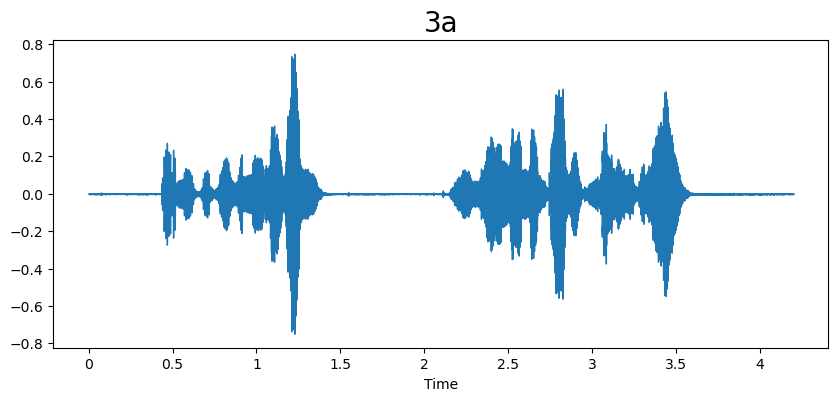

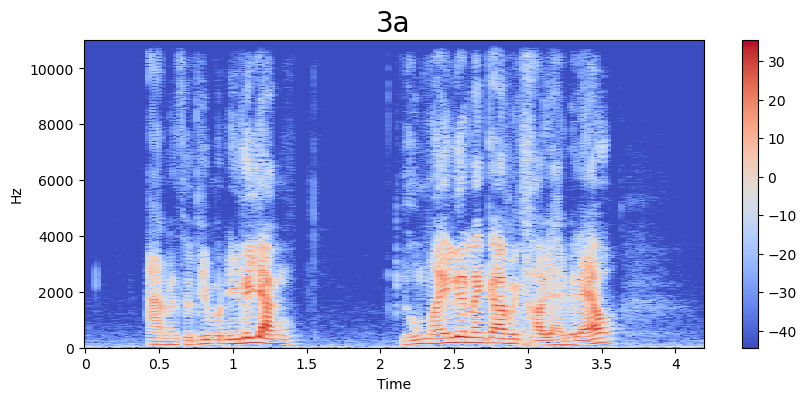

In [8]:
emotion = '3a'
path = df['speech'][df['label']==emotion][0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

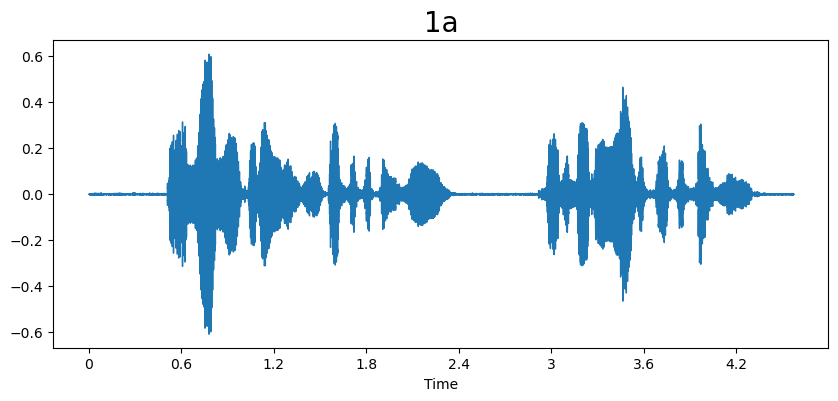

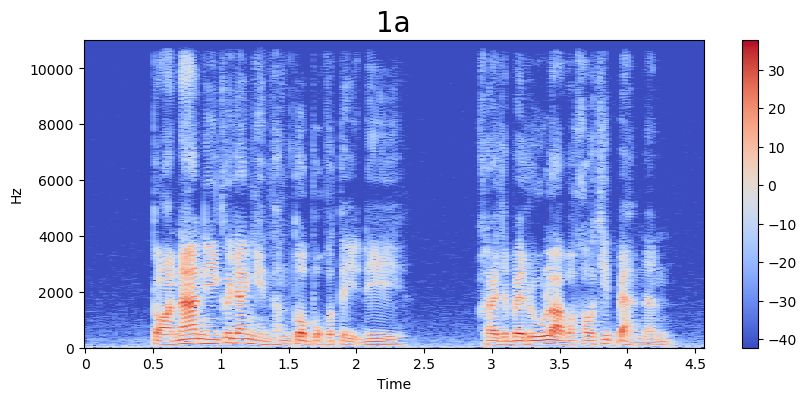

In [9]:
emotion = '1a'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

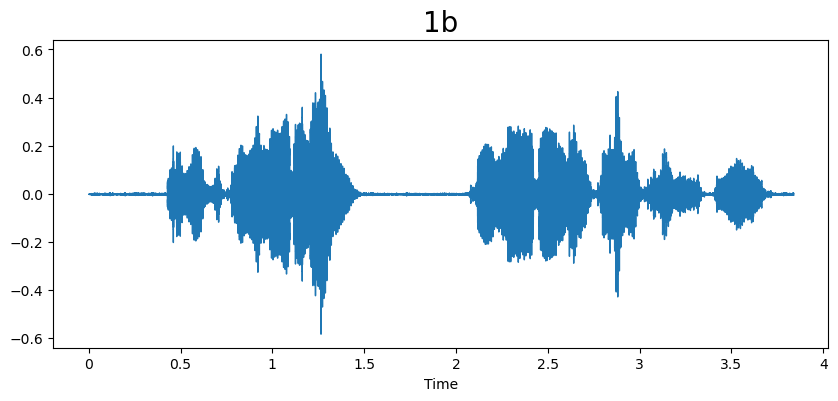

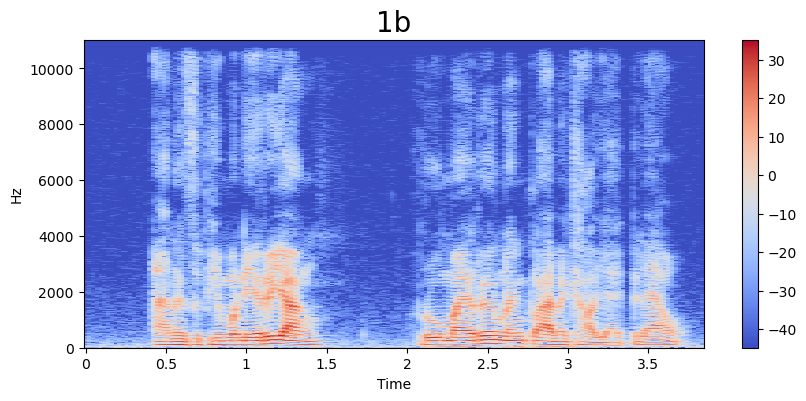

In [10]:
emotion = '1b'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

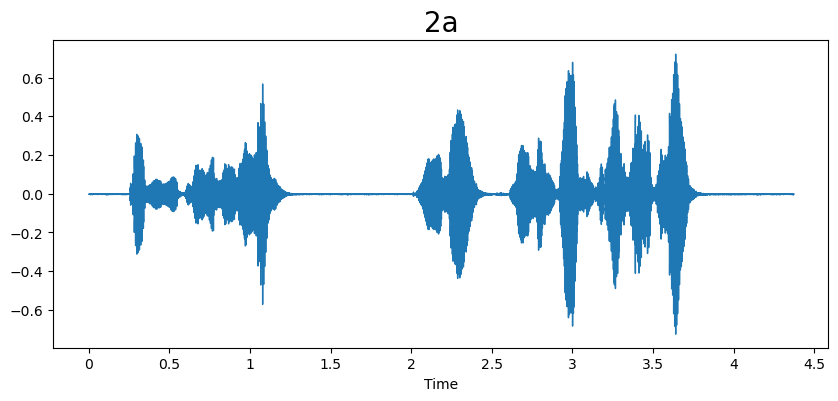

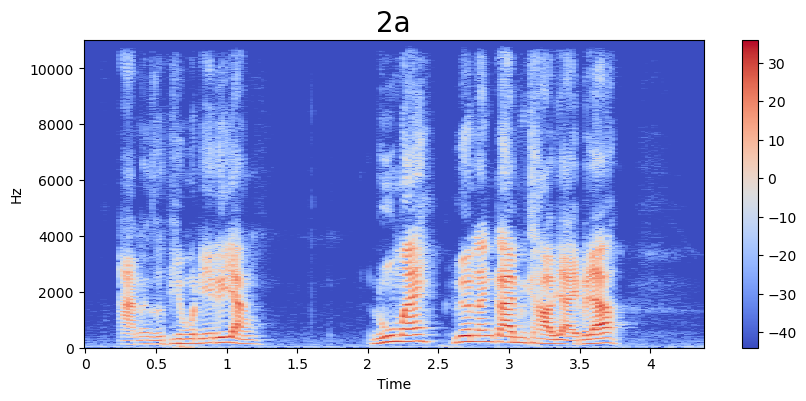

In [11]:
emotion = '2a'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

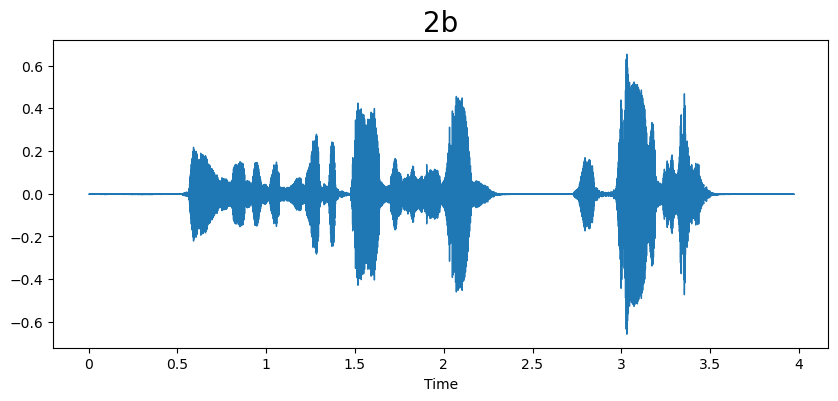

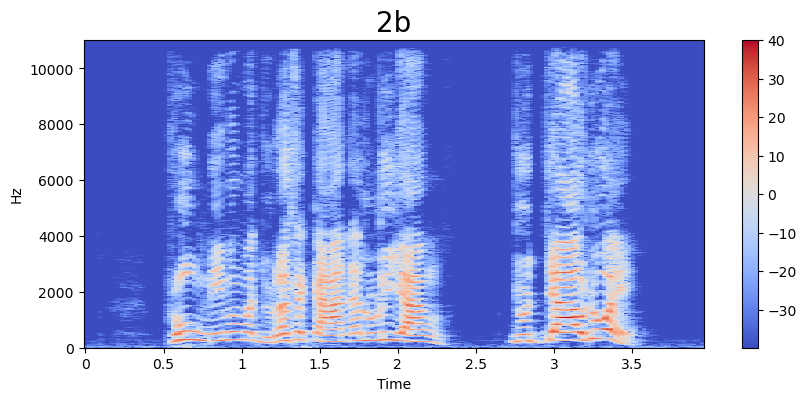

In [12]:
emotion = '2b'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

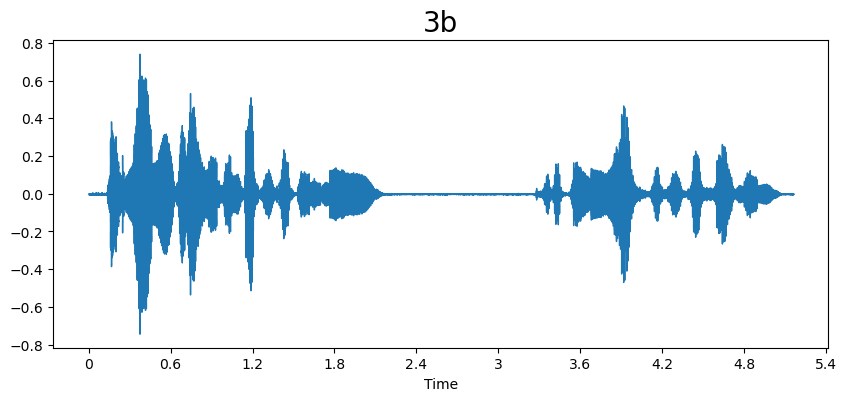

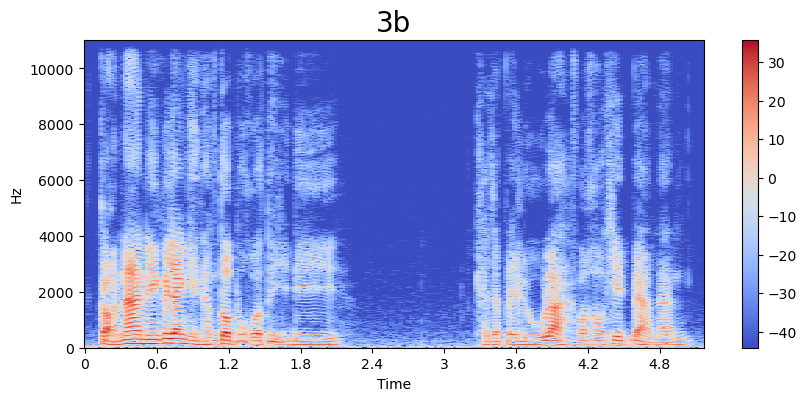

In [13]:
emotion = '3b'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

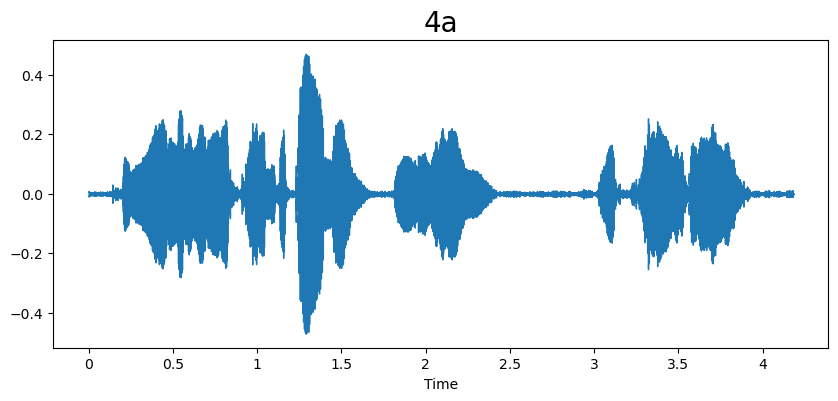

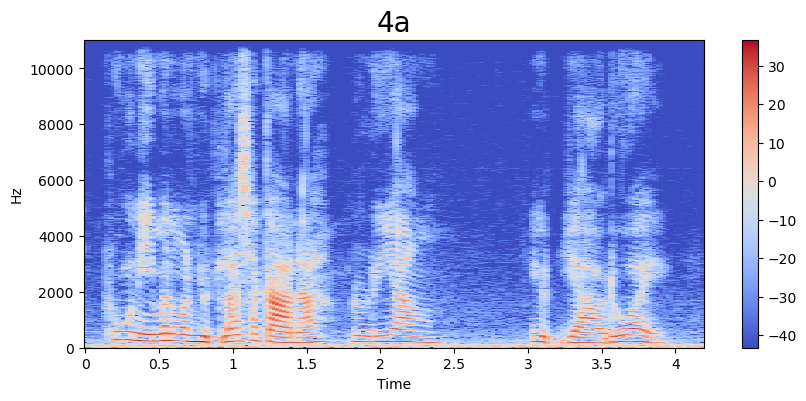

In [14]:
emotion = '4a'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

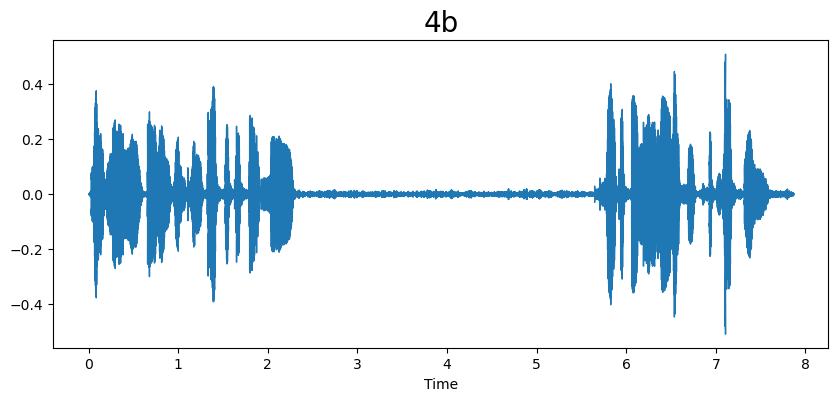

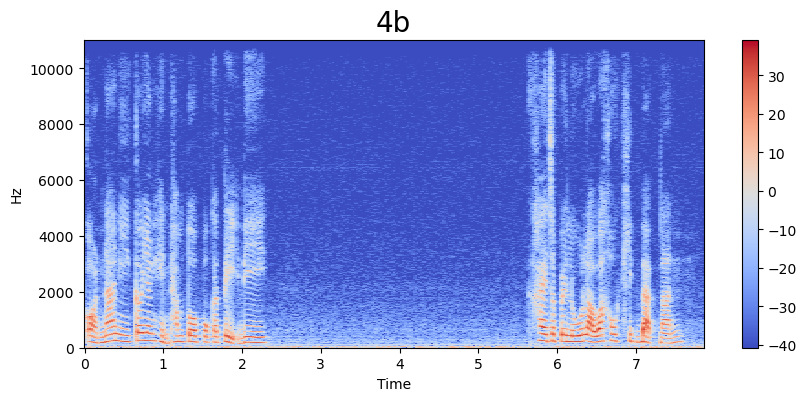

In [15]:
emotion = '4b'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

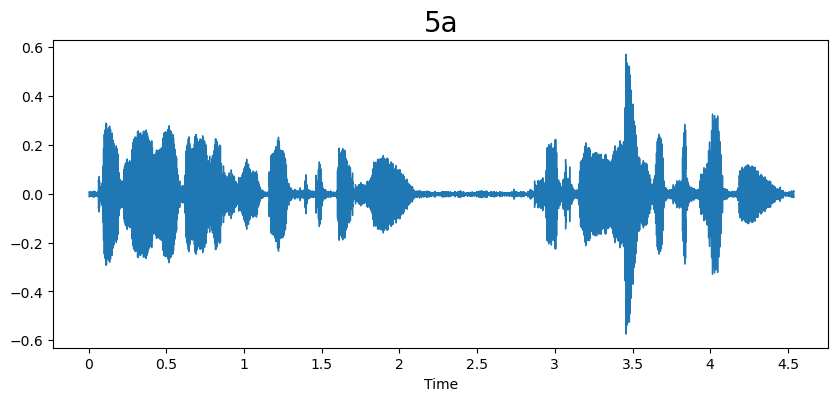

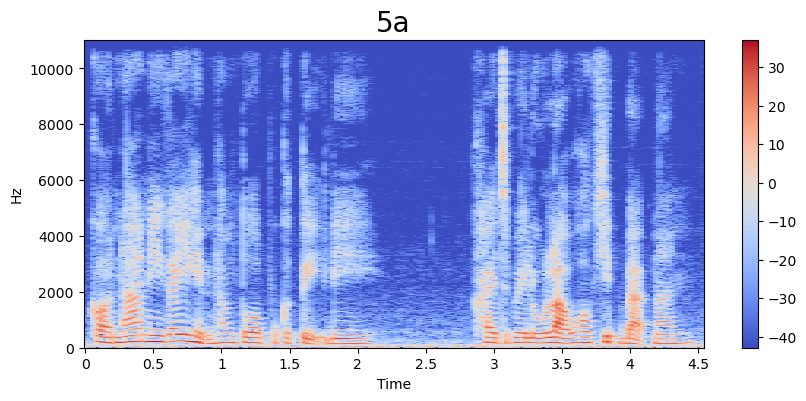

In [16]:
emotion = '5a'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

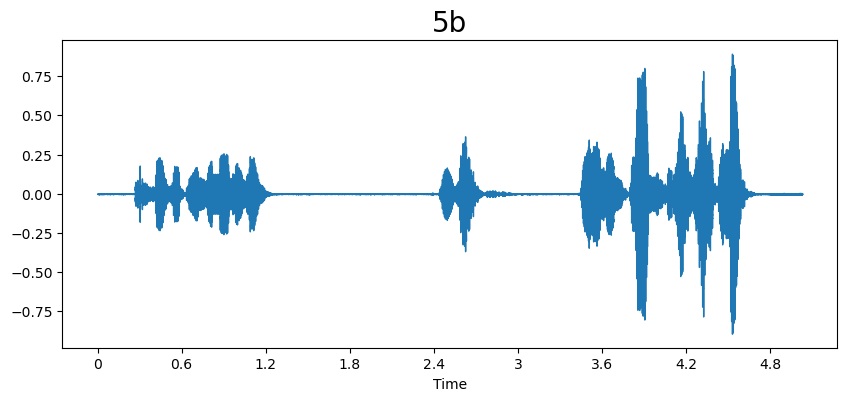

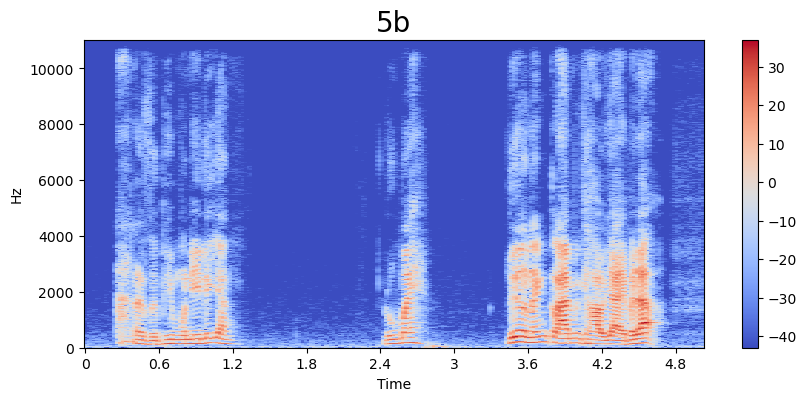

In [17]:
emotion = '5b'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

## Feature Extraction ##


In [18]:
def extract_mfcc (filename):
    y, sr = librosa.load(filename, duration=3, offset =0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc =40).T, axis =0)
    return mfcc

In [19]:
extract_mfcc(df['speech'][0])

array([-3.1561490e+02,  1.1813438e+02, -2.0966982e+01,  1.6562872e+01,
        2.2392546e+01, -9.8770161e+00, -9.1120110e+00,  5.8380251e+00,
       -2.1735537e+01, -5.4450637e-01, -5.7271614e+00, -3.5262325e+00,
       -2.6651892e-01, -1.0465606e+01,  3.9768639e-01,  7.6238906e-01,
       -5.3597593e+00, -1.5696195e+00, -1.8691474e+00, -2.9770250e+00,
       -5.0021830e+00, -1.1250532e+00, -5.2127619e+00, -5.2670059e+00,
       -2.6141775e+00, -2.0175142e+00, -4.2548327e+00, -3.1723467e-01,
       -5.1935897e+00, -7.5894660e-01, -4.1171613e+00, -3.7636747e+00,
       -4.3220906e+00, -2.4431157e+00, -2.9646523e+00,  5.1281244e-01,
       -9.6244729e-01,  8.9468491e-01,  9.6317011e-01,  1.0546304e+00],
      dtype=float32)

In [20]:
x_mfcc =  df ['speech'].apply(lambda x: extract_mfcc(x))

In [21]:
x_mfcc

0      [-315.6149, 118.13438, -20.966982, 16.562872, ...
1      [-319.54684, 123.56033, -1.6879084, 30.588844,...
2      [-334.47107, 124.52126, -8.303542, 26.185505, ...
3      [-347.96503, 122.596924, 15.825761, 46.89386, ...
4      [-317.57266, 142.68503, -6.5189595, 14.58759, ...
                             ...                        
113    [-333.99405, 121.48753, -3.8532212, 26.045797,...
114    [-331.54837, 122.11058, 11.658969, 27.088028, ...
115    [-333.37177, 117.6856, -3.4560995, 30.027367, ...
116    [-341.03018, 129.12671, -21.983805, 12.135475,...
117    [-378.08078, 115.93933, 0.55461013, 18.758888,...
Name: speech, Length: 118, dtype: object

In [22]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(118, 40)

In [23]:
X = np.expand_dims(X, -1)
X.shape

(118, 40, 1)

In [24]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [25]:
y = y.toarray()

In [26]:
y.shape

(118, 10)

## Create the LSTM Model ##

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM (123, return_sequences= False, input_shape =(40,1)),
    Dense(64,activation ='relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(10, activation= 'softmax')
])

model.compile(loss="categorical_crossentropy", optimizer ='adam', metrics =['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 71,846
Trainable params: 71,846
Non-traina

 ## Training The Model ##

In [28]:
history = model.fit(X, y,validation_split = 0.2, epochs = 100, batch_size=60, shuffle= False)

Epoch 1/100
2/2 [==============================] - 3s 566ms/step - loss: 2.3027 - accuracy: 0.0745 - val_loss: 2.2599 - val_accuracy: 0.2083
Epoch 2/100
2/2 [==============================] - 0s 70ms/step - loss: 2.2795 - accuracy: 0.1170 - val_loss: 2.2470 - val_accuracy: 0.1250
Epoch 3/100
2/2 [==============================] - 0s 68ms/step - loss: 2.2685 - accuracy: 0.1702 - val_loss: 2.2381 - val_accuracy: 0.1250
Epoch 4/100
2/2 [==============================] - 0s 65ms/step - loss: 2.2596 - accuracy: 0.1170 - val_loss: 2.2326 - val_accuracy: 0.0833
Epoch 5/100
2/2 [==============================] - 0s 62ms/step - loss: 2.2711 - accuracy: 0.1277 - val_loss: 2.2237 - val_accuracy: 0.1250
Epoch 6/100
2/2 [==============================] - 0s 67ms/step - loss: 2.2232 - accuracy: 0.1489 - val_loss: 2.2119 - val_accuracy: 0.2500
Epoch 7/100
2/2 [==============================] - 0s 71ms/step - loss: 2.2264 - accuracy: 0.2234 - val_loss: 2.1997 - val_accuracy: 0.2500
Epoch 8/100
2/2 [==

## Plot the results ##


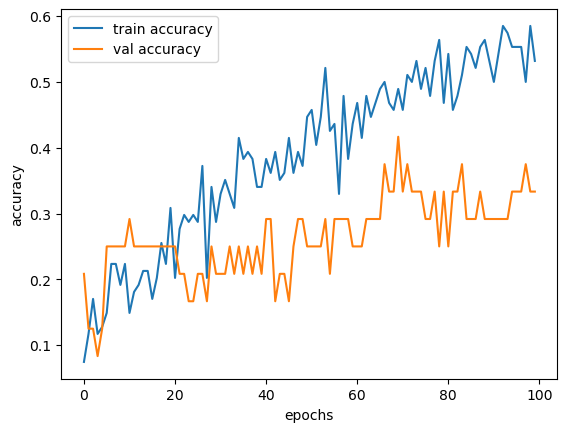

In [29]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label ='train accuracy')
plt.plot(epochs, val_acc, label ='val accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

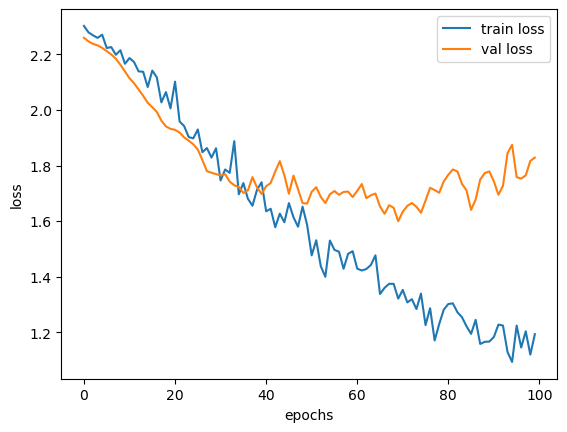

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label ='train loss')
plt.plot(epochs, val_loss, label ='val loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

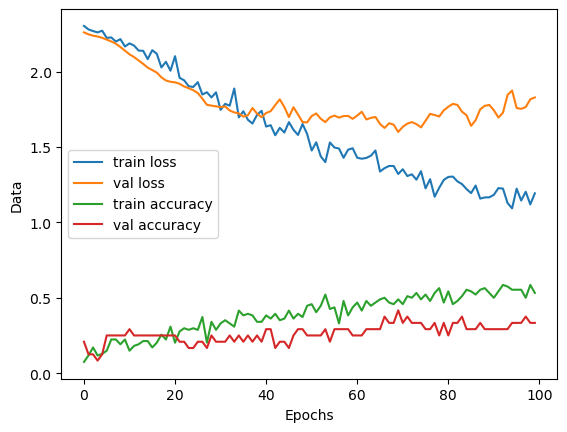

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label ='train loss')
plt.plot(epochs, val_loss, label ='val loss')

plt.plot(epochs, acc, label ='train accuracy')
plt.plot(epochs, val_acc, label ='val accuracy')

plt.xlabel('Epochs')
plt.ylabel('Data')
plt.legend()
plt.show()

In [32]:
import pickle
filename = 'savedmodel.sav'
pickle.dump(model,open(filename,'wb'))

In [33]:
pickle.dump(model,open("rf.h5","wb"))

In [34]:
load_model = pickle.load(open(filename,'rb'))